In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np


In [2]:
csv_file_path = 'extracted_data/extracted_data_3.5.csv'

df = pd.read_csv(csv_file_path)

df.shape

(188, 102)

In [3]:
X = df.iloc[:, :-2]
y = df.iloc[:, -1:]

y = y*10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (159, 100)
X_test shape: (29, 100)
y_train shape: (159, 1)
y_test shape: (29, 1)


In [4]:
X_train

,Spannung_1,Spannung_2,Spannung_3,Spannung_4,Spannung_5,Spannung_6,Spannung_7,Spannung_8,Spannung_9,Spannung_10,...,AhAkku_41,AhAkku_42,AhAkku_43,AhAkku_44,AhAkku_45,AhAkku_46,AhAkku_47,AhAkku_48,AhAkku_49,AhAkku_50
96,3.500624,3.502641,3.504657,3.506673,3.508690,3.510706,3.512722,3.514739,3.516755,3.518771,...,1.025456,1.030309,1.035163,1.040016,1.044870,1.049723,1.054577,1.059430,1.064284,1.069137
166,3.500798,3.502818,3.504838,3.506857,3.508877,3.510897,3.512917,3.514937,3.516956,3.518976,...,1.502789,1.503893,1.504997,1.506100,1.507204,1.508307,1.509411,1.510514,1.511618,1.512721
9,3.503369,3.505331,3.507294,3.509256,3.511219,3.513181,3.515143,3.517106,3.519068,3.521031,...,1.509401,1.511376,1.513351,1.515326,1.517301,1.519276,1.521252,1.523227,1.525202,1.527177
152,3.502696,3.504630,3.506564,3.508498,3.510432,3.512366,3.514300,3.516234,3.518168,3.520102,...,1.758994,1.759428,1.759863,1.760298,1.760732,1.761167,1.761602,1.762036,1.762471,1.762906
78,3.500591,3.502618,3.504644,3.506670,3.508696,3.510723,3.512749,3.514775,3.516801,3.518828,...,1.006354,1.011926,1.017498,1.023069,1.028641,1.034213,1.039785,1.045356,1.050928,1.056500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3.504664,3.506568,3.508472,3.510376,3.512280,3.514184,3.516088,3.517992,3.519896,3.521800,...,1.696795,1.697304,1.697813,1.698322,1.698832,1.699341,1.699850,1.700359,1.700869,1.701378
14,3.500810,3.502772,3.504734,3.506697,3.508659,3.510622,3.512584,3.514547,3.516509,3.518471,...,1.831547,1.831817,1.832088,1.832359,1.832630,1.832901,1.833172,1.833443,1.833714,1.833985
92,3.503877,3.505798,3.507720,3.509642,3.511564,3.513486,3.515408,3.517330,3.519252,3.521174,...,1.872920,1.873070,1.873221,1.873371,1.873521,1.873671,1.873822,1.873972,1.874122,1.874273
179,3.501347,3.503357,3.505366,3.507376,3.509386,3.511395,3.513405,3.515415,3.517425,3.519434,...,1.250205,1.253401,1.256598,1.259794,1.262991,1.266188,1.269384,1.272581,1.275777,1.278974


In [5]:
# num_features = X_train.shape[1]
# print(num_features)
# num_rows = (num_features + 2) // 4
# num_columns = min(num_features, 4)

# fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 10*num_columns))

# axes = axes.flatten()

# for feature_idx in range(num_features):
#     ax = axes[feature_idx]

#     feature_name = X_train.columns[feature_idx]  # Assuming X_train is a DataFrame
#     ax.scatter(X_train[feature_name], y_train, label=f'{feature_name}')
#     ax.set_xlabel(f'{feature_name}')
#     ax.set_ylabel('Capacity')
#     ax.set_title(f'Scatter Plot of {feature_name} vs. Capacity')
#     ax.legend()

# plt.tight_layout()

# plt.show()


In [6]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='linear')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6464      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 256)               16640     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 

In [7]:
model.compile(optimizer='adam', loss=tf.compat.v1.losses.mean_squared_error)

In [8]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/100

5/5 - 8s - loss: 140.9032 - val_loss: 54.0089 - 8s/epoch - 2s/step
Epoch 2/100
5/5 - 0s - loss: 68.1489 - val_loss: 22.6812 - 183ms/epoch - 37ms/step
Epoch 3/100
5/5 - 0s - loss: 56.0417 - val_loss: 25.2997 - 187ms/epoch - 37ms/step
Epoch 4/100
5/5 - 0s - loss: 48.6378 - val_loss: 38.9886 - 179ms/epoch - 36ms/step
Epoch 5/100
5/5 - 0s - loss: 44.8707 - val_loss: 40.8114 - 226ms/epoch - 45ms/step
Epoch 6/100
5/5 - 0s - loss: 35.3010 - val_loss: 28.0552 - 133ms/epoch - 27ms/step
Epoch 7/100
5/5 - 0s - loss: 35.9552 - val_loss: 25.9720 - 216ms/epoch - 43ms/step
Epoch 8/100
5/5 - 0s - loss: 34.8265 - val_loss: 34.4100 - 288ms/epoch - 58ms/step
Epoch 9/100
5/5 - 0s - loss: 34.2507 - val_loss: 41.2104 - 319ms/epoch - 64ms/step
Epoch 10/100
5/5 - 0s - loss: 34.5979 - val_loss: 32.9310 - 375ms/epoch - 75ms/step
Epoch 11/100
5/5 - 0s - loss: 35.1940 - val_loss: 33.7561 - 299ms/epoch - 60ms/step
Epoch 12/100
5/5 - 0s - loss: 28.8577 - val_loss: 38.4668 - 222ms/epoch - 44ms/step
Epoc

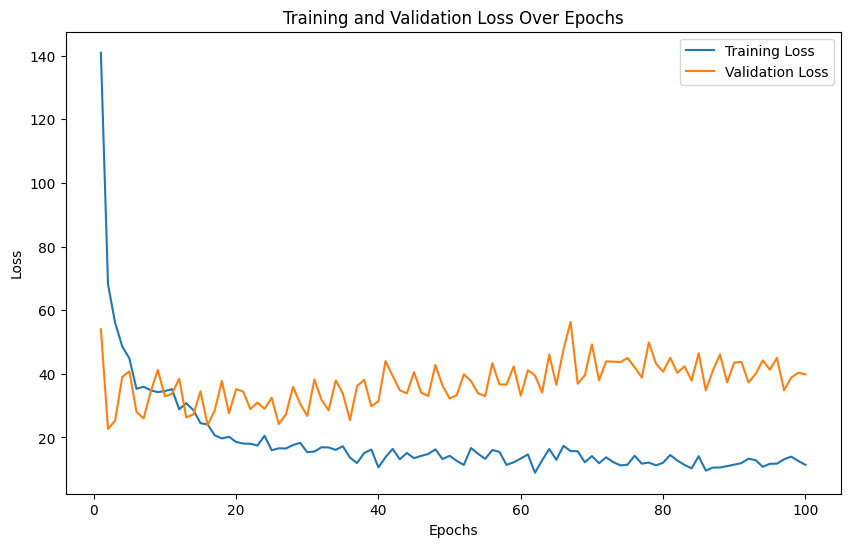

In [9]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(1, len(train_loss) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
accuracy = 1 - loss
print(f"Accuracy: {accuracy}")

1/1 [==============================] - 0s 140ms/step - loss: 32.9397
Test Loss: 32.93965148925781
Accuracy: -31.939651489257812


In [11]:
predictions = model.predict(X_test)

r2 = r2_score(y_test, predictions)
print(f"R-squared (R2) Score: {r2}")

1/1 [==============================] - 1s 662ms/step
R-squared (R2) Score: -0.2801068775830702


1/1 [==============================] - 0s 230ms/step
True Value: 7.11  |  Predicted Value: 5.48  |  Difference: 1.63
True Value: 15.68  |  Predicted Value: 9.49  |  Difference: 6.19
True Value: 17.05  |  Predicted Value: 6.39  |  Difference: 10.66
True Value: 4.11  |  Predicted Value: 4.72  |  Difference: -0.62
True Value: 16.12  |  Predicted Value: 9.77  |  Difference: 6.35
True Value: 5.13  |  Predicted Value: 5.00  |  Difference: 0.13
True Value: 6.98  |  Predicted Value: 5.37  |  Difference: 1.60
True Value: 6.21  |  Predicted Value: 5.02  |  Difference: 1.19
True Value: 3.66  |  Predicted Value: 4.29  |  Difference: -0.64
True Value: 17.03  |  Predicted Value: 9.77  |  Difference: 7.25
True Value: 7.04  |  Predicted Value: 4.82  |  Difference: 2.21
True Value: 7.54  |  Predicted Value: 5.95  |  Difference: 1.60
True Value: 11.29  |  Predicted Value: 6.25  |  Difference: 5.04
True Value: 5.62  |  Predicted Value: 4.29  |  Difference: 1.32
True Value: 15.44  |  Predicted Value: 6.99

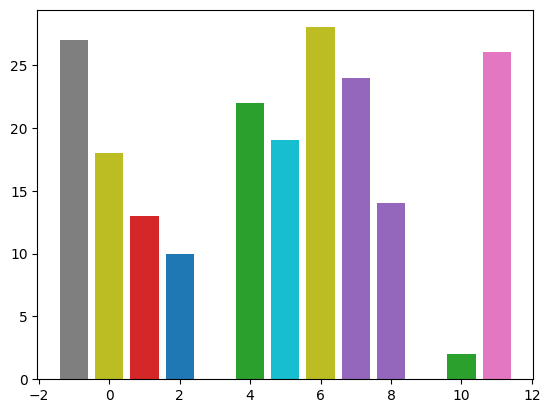

In [12]:
# Assuming y_test is a Pandas DataFrame
y_test_values = y_test.to_numpy().flatten()

# Get model predictions
predictions = model.predict(X_test).flatten()

i=0
# Print y_test, predictions, and the difference side by side
for true_value, predicted_value in zip(y_test_values, predictions):
    difference = true_value - predicted_value
    print(f'True Value: {true_value:.2f}  |  Predicted Value: {predicted_value:.2f}  |  Difference: {difference:.2f}')
    #plt.scatter(difference,i)
    difference = difference // 1
    plt.bar(difference,i)
    i+=1
plt.show()


#### Plot actual values vs predictions

5/5 [==============================] - 0s 7ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

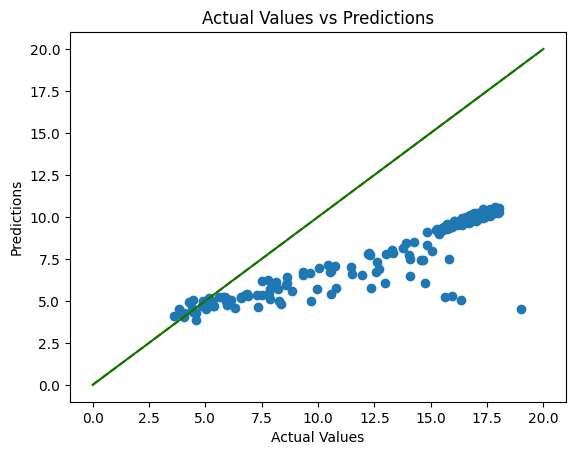

In [15]:

predictions = model.predict(X_train).flatten()
plt.scatter(y_train, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual Values vs Predictions')

#plt.xlim(0, 20)
#plt.ylim(0, 20)

plt.plot([0, 20], [0, 20], color='red', linestyle='--', label='Slope 1 Line')

plt.show